# Notas do curso Séries Temporais com Python

## Capítulo 2: Métricas e Técnicas de Séries Temporais

### 1. Métricas

O objetivo principal neste curso (e de forma geral) é observar os dados em sequências temporais passadas a fim de, utilizando um algoritmo de regressão, predizer os dados futuros desta sequência.

Simplificando bastante, regressão é uma técnica que busca determinar qual é a curva que melhor se ajusta aos dados de uma série temporal. Existem inúmeros métodos para realizar esta determinação, no entanto vamos começar estudando a regressão linear a título de exemplo. Note que este exemplo será realizado apenas para que possamos explorar outros conceitos e métricas tais como resíduos (ou erro) que é definido como a diferença entre a previsão e os dados reais. Para isso, vamos separar a base de dados em duas partes: uma para treinamento e, portanto, ajuste e determinação da curvade regressão, e outra parte para teste onde calcularemos o resíduo a partir da diferença entre a extrapolação da curva e os dados reais. Façamos este procedimento de forma paulatina.

Começamos, obviamente, pela tomada dos dados. Neste caso usaremos uma base cuja série temporal tem um característica linear evidente.

In [96]:
# Importando biblioteca para ler dados
import pandas as pd

# Importando biblioteca para desenhar gráficos
import matplotlib.pyplot as plt

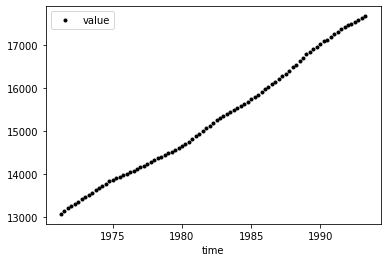

In [97]:
# Dados trimestrais de residentes australianos (de 1971 a 1994)
austres = pd.read_csv("../Material/Dados/austres.csv")

# Removendo coluna de ordenamento
data = austres.drop("Unnamed: 0", axis=1)

# Transformando o dataframe em série temporal
ts = data.set_index('time')

# Desenhando gráficos a partir dos dados lidos
ts.plot(style = 'k.')
plt.show()

In [126]:
# Importando biblioteca para regressão linear
from sklearn import linear_model as lm
#from sklearn.model_selection import train_test_split as ttsplit

# Importando biblioteca para lidar com grandezas numéricas
import numpy as np

In [132]:
# Carregando dados de variáveis independente e dependente
X = data.index
Y = data.iloc[:, 0]

# Separando dados em amostras de treino e de teste
X_tr = X[:-15]
X_te = X[-15:]

Y_tr = Y[:-15]
Y_te = Y[-15:]

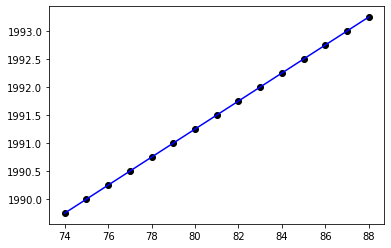

In [133]:
# Treinando o modelo de regressão linear
reg = linear_model.LinearRegression(); reg.fit(np.reshape(a = np.array(X_tr), newshape = (-1, 1)),
                                               np.reshape(a = np.array(Y_tr), newshape = (-1, 1)))

# Prevendo os valores a partir dos dados de teste
Y_pr = reg.predict(np.reshape(a = np.array(X_te), newshape = (-1, 1)))
      
# Desenhando o modelo (azul) junto com os dados (preto)
plt.scatter(x = X_te, y = Y_te,
            color = 'black')
plt.plot(X_te, Y_pr,
         color = 'blue')
plt.show()